# Excercise  1

In [10]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from scipy.stats import norm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import random

# for creating a flattened plot
%matplotlib inline

In [11]:
Dataset_a = sio.loadmat('HW9a.mat')

train_x_a = Dataset_a['train_X']
train_y_a = Dataset_a['train_y']
test_x_a = Dataset_a['test_X']
test_y_a = Dataset_a['test_y']




def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Part 1

Train the SVM classifier using the training set given above and measure its performance using the test set, using the polynomial kernel.

* We will explore various parameters for the 'poly' kernel

Due to the time required to train the model, the parameter exploration part has been commented out and the corresponding best model is presented. The train scores and coresponding models that were exploted may be found in the cv file provided.

In [12]:

# best = 0

# param_pars = []
# for C_range in np.logspace(0, 5, 5):
#     for gamma_range in ['scale','auto']:
#         for degree_range in range(3,5):
#             for coef0_range in np.linspace(0,10,5):
#                     for max_iter_range in [-1]:
#                         param_pars = {'gamma':gamma_range, "C":C_range, 'degree':degree_range, 
#                                     'coef0' : coef0_range, 'max_iter':max_iter_range}
#                         clf = svm.SVC(random_state=42, kernel='poly')
#                         clf.set_params(**param_pars)

#                         clf.fit(train_x_a, train_y_a.reshape(270)) 
#                         score = accuracy_score(test_y_a, clf.predict(test_x_a).flatten())*100
#                         if accuracy_score(test_y_a, clf.predict(test_x_a).flatten())*100 > best:
                            
#                             print(f"{score:.2f} \t {param_pars}")
#                             best_clf = clf



In [13]:
# Comment out this part if you executed the previous cell
best_params =  {'gamma': 'scale', 'C': 100000.0, 'degree': 4, 'coef0': 2.5, 'max_iter': -1}
best_clf = svm.SVC(random_state=42, kernel='poly')
best_clf.set_params(**best_params)
best_clf.fit(train_x_a, train_y_a.reshape(270))


SVC(C=100000.0, coef0=2.5, degree=4, kernel='poly', random_state=42)

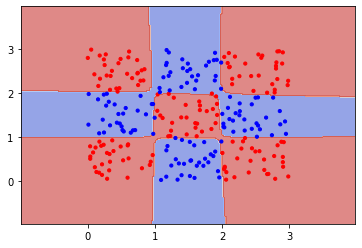

Accuracy Score: 97.04%


In [14]:
# plot results
X00, X11 = test_x_a[:,0], test_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)

fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
plot_contours(ax, best_clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

print(f"Accuracy Score: {accuracy_score(test_y_a, best_clf.predict(test_x_a).flatten())*100:.2f}%")

## Part 2
### RandomizedSearch for the 'rbf' kernel

* We will explore various parameters for the 'rbf' kernel

In [15]:
best = 0
auc = make_scorer(roc_auc_score)

param_pars = []
for C_range in np.logspace(0, 5, 500):
    for gamma_range in ['scale','auto']:
        for decision_function_shape in ['ovo', 'ovr']:
            param_pars = {'gamma':gamma_range, "C":C_range, 'decision_function_shape':decision_function_shape}
            clf = svm.SVC(random_state=42, kernel='rbf')
            clf.set_params(**param_pars)

            clf.fit(train_x_a, train_y_a.reshape(270)) 
            score = accuracy_score(test_y_a, clf.predict(test_x_a).flatten())*100
            if roc_auc_score(test_y_a, clf.predict(test_x_a).flatten())*100 > best:
                
                print(f"{score:.2f} \t {param_pars}")
                best = accuracy_score(test_y_a, clf.predict(test_x_a).flatten())*100
                best_clf_rbf = clf
best_clf_rbf

88.89 	 {'gamma': 'scale', 'C': 1.0, 'decision_function_shape': 'ovo'}
88.89 	 {'gamma': 'scale', 'C': 1.0, 'decision_function_shape': 'ovr'}
88.89 	 {'gamma': 'scale', 'C': 1.023340212191642, 'decision_function_shape': 'ovo'}
88.89 	 {'gamma': 'scale', 'C': 1.023340212191642, 'decision_function_shape': 'ovr'}
89.63 	 {'gamma': 'scale', 'C': 2.6968806263906933, 'decision_function_shape': 'ovo'}
90.37 	 {'gamma': 'scale', 'C': 2.824241326078435, 'decision_function_shape': 'ovo'}
91.11 	 {'gamma': 'scale', 'C': 3.0266480593956917, 'decision_function_shape': 'ovo'}
91.85 	 {'gamma': 'scale', 'C': 6.188468238624386, 'decision_function_shape': 'ovo'}
92.59 	 {'gamma': 'scale', 'C': 11.807128466661897, 'decision_function_shape': 'ovo'}
93.33 	 {'gamma': 'scale', 'C': 13.250872919979532, 'decision_function_shape': 'ovo'}
93.70 	 {'gamma': 'scale', 'C': 14.531975242368961, 'decision_function_shape': 'ovo'}
94.07 	 {'gamma': 'scale', 'C': 25.28166144331499, 'decision_function_shape': 'ovo'}
94.

SVC(C=1013.9394576752917, decision_function_shape='ovo', gamma='auto',
    random_state=42)

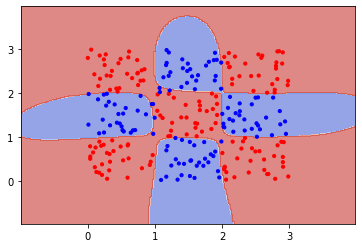

roc_au Score: 96.67%


In [16]:
# plot resutlts
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
plot_contours(ax, best_clf_rbf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

print(f"roc_au Score: {accuracy_score(test_y_a, best_clf_rbf.predict(test_x_a).flatten())*100:.2f}%")

## Compare the produced results with those obtained in exercise 8 of Homework 8.

Unlike Excercise 8, in this one we further explored the various paramterers for the two models. First of all we see that the score achieved is similar in both cases, at around 97%. Both methods have their pros and cons. While the rbf has a very small training time, it doesn't have that many options in terms of available parameters. On the other hand the poly one has a lot of parameters to experiment with, but due to polynomial terms being calculated, the complexity can get very high, which result in extremely high training times.

What both models have in common is high values for C. This  is justified, since, as we know from theory, the higher the value of C the small the "support vector" meaning that the is less space separating the two areas. In our case the points are very close to one another, thus a high value of C is needed to properly assign the corresponding classes.

## Excercise  2

In [17]:
# Load the data
Dataset_b = sio.loadmat('HW9b.mat')

train_x_b = Dataset_b['train_X']
train_y_b = Dataset_b['train_y']
test_x_b = Dataset_b['test_X']
test_y_b = Dataset_b['test_y']

## Train 

Train a neural network classifier with a single hidden layer where the nodes have the hyperbolic tangent output function with:
* 3 nodes
* 4 nodes
* 10 nodes
* 50 nodes

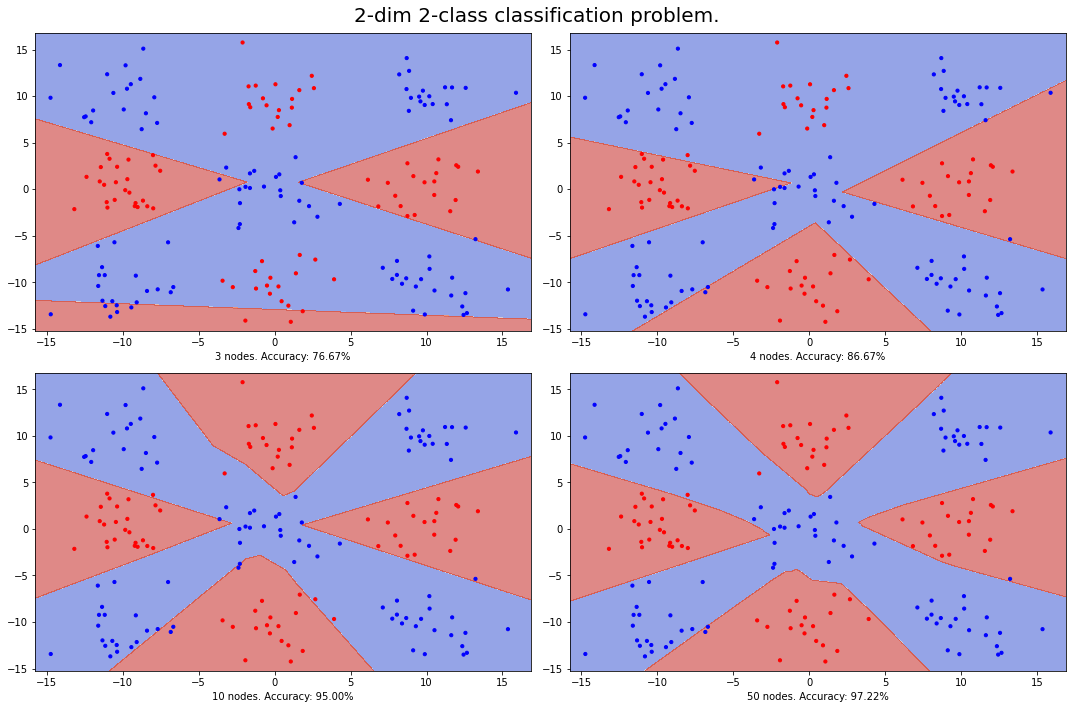

In [18]:
X00, X11 = test_x_b[:,0], test_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
color= ['red' if l == 1 else 'blue' for l in test_y_b.reshape(180)]

# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

mapping = {1:3, 2:4, 3:10, 4:50}
pos = 1
for i,triaxis in enumerate(axes):
    for j, axis in enumerate(triaxis):
            nn = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=mapping[pos], random_state=1, max_iter=1000)
            nn.fit(train_x_b, train_y_b.reshape(180))

            plot_contours(axis, nn, xx, yy,
                            cmap=plt.cm.coolwarm, alpha=0.6)
            axis.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
            score = accuracy_score(test_y_b, nn.predict(test_x_b).flatten())*100
            axis.set_xlabel(f'{mapping[pos]} nodes. Accuracy: {score:.2f}%')
            pos += 1
# Title
fig.suptitle('2-dim 2-class classification problem.', fontsize=20)
_ = fig.tight_layout()

## Comment on the results.

As expected the more nodes we have, even in this simple case, the higher the accuracy. This is expected, since NN's theory specifies that if k is large enough any problem could be solved. However, in practice k would get that large that calculation would be impossible. 

## Bonus

We will try exploring various paramters in order to further improve the accuracy.

In [27]:
best = 0

for alpha in np.logspace(-5, 1, 20):
    for solver in ['lbfgs', 'sgd', 'adam']:
        for learning_rate in ['constant', 'invscaling', 'adaptive']:
            for hidden_layer_sizes in [50, 75, 100, 200]:
                params = param_pars = {'alpha':alpha, 'solver':solver, 'learning_rate':learning_rate, 'hidden_layer_sizes':hidden_layer_sizes}
                nn = MLPClassifier(random_state=1,  activation='tanh', max_iter=10000)
                nn.set_params(**params)
                nn.fit(train_x_b, train_y_b.reshape(180))

                score = accuracy_score(test_y_b, nn.predict(test_x_b).flatten())*100
                if score > best:
                    print(f"{score:.2f} \t {params}")
                    best = score
                    best_nn = nn        

print(f"Accuracy Score: {accuracy_score(test_y_b, best_nn.predict(test_x_b).flatten())*100:.2f}%")

94.44 	 {'alpha': 1e-05, 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 50}
95.00 	 {'alpha': 1e-05, 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 75}
96.11 	 {'alpha': 1e-05, 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}
96.67 	 {'alpha': 1e-05, 'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}
97.78 	 {'alpha': 1e-05, 'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 50}
98.33 	 {'alpha': 0.5455594781168515, 'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': 200}
Accuracy Score: 98.33%


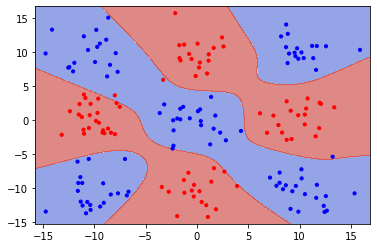

Accuracy Score: 98.33%


In [28]:
# plot resutlts
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in test_y_b.reshape(180)]
plot_contours(ax, best_nn, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

print(f"Accuracy Score: {accuracy_score(test_y_b, best_nn.predict(test_x_b).flatten())*100:.2f}%")

* Results slighlty improved, achieving an accuracy of 98.33%.

# The end :)